In [5]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):  
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.utils import util

In [6]:
debugging = True
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
input_parent_dir = os.path.join(pipeline_dir, '05')

sca_dirnames = [os.path.basename(d) for d in glob(os.path.join(input_parent_dir, 'sca*')) if os.path.isdir(d)]
scas = sorted([int(d[3:]) for d in sca_dirnames])
scas = [str(sca).zfill(2) for sca in scas]

In [11]:
file_list = []
for sca in scas:
    input_dir = os.path.join(input_parent_dir, f'sca{sca}')
    file_list += sorted(glob(input_dir + '/galsim_color_*[0-9].npy'))

# side = math.floor(math.sqrt(len(file_list)))
side = 5
file_list = file_list[:side ** 2]

color_list = [np.load(i) for i in file_list]
# np.isnan(np.min(color_list))

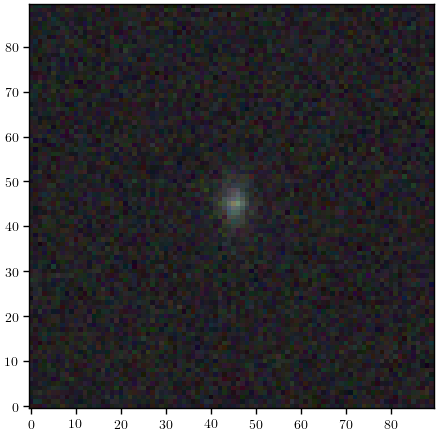

In [12]:
plt.imshow(color_list[0])
plt.show()

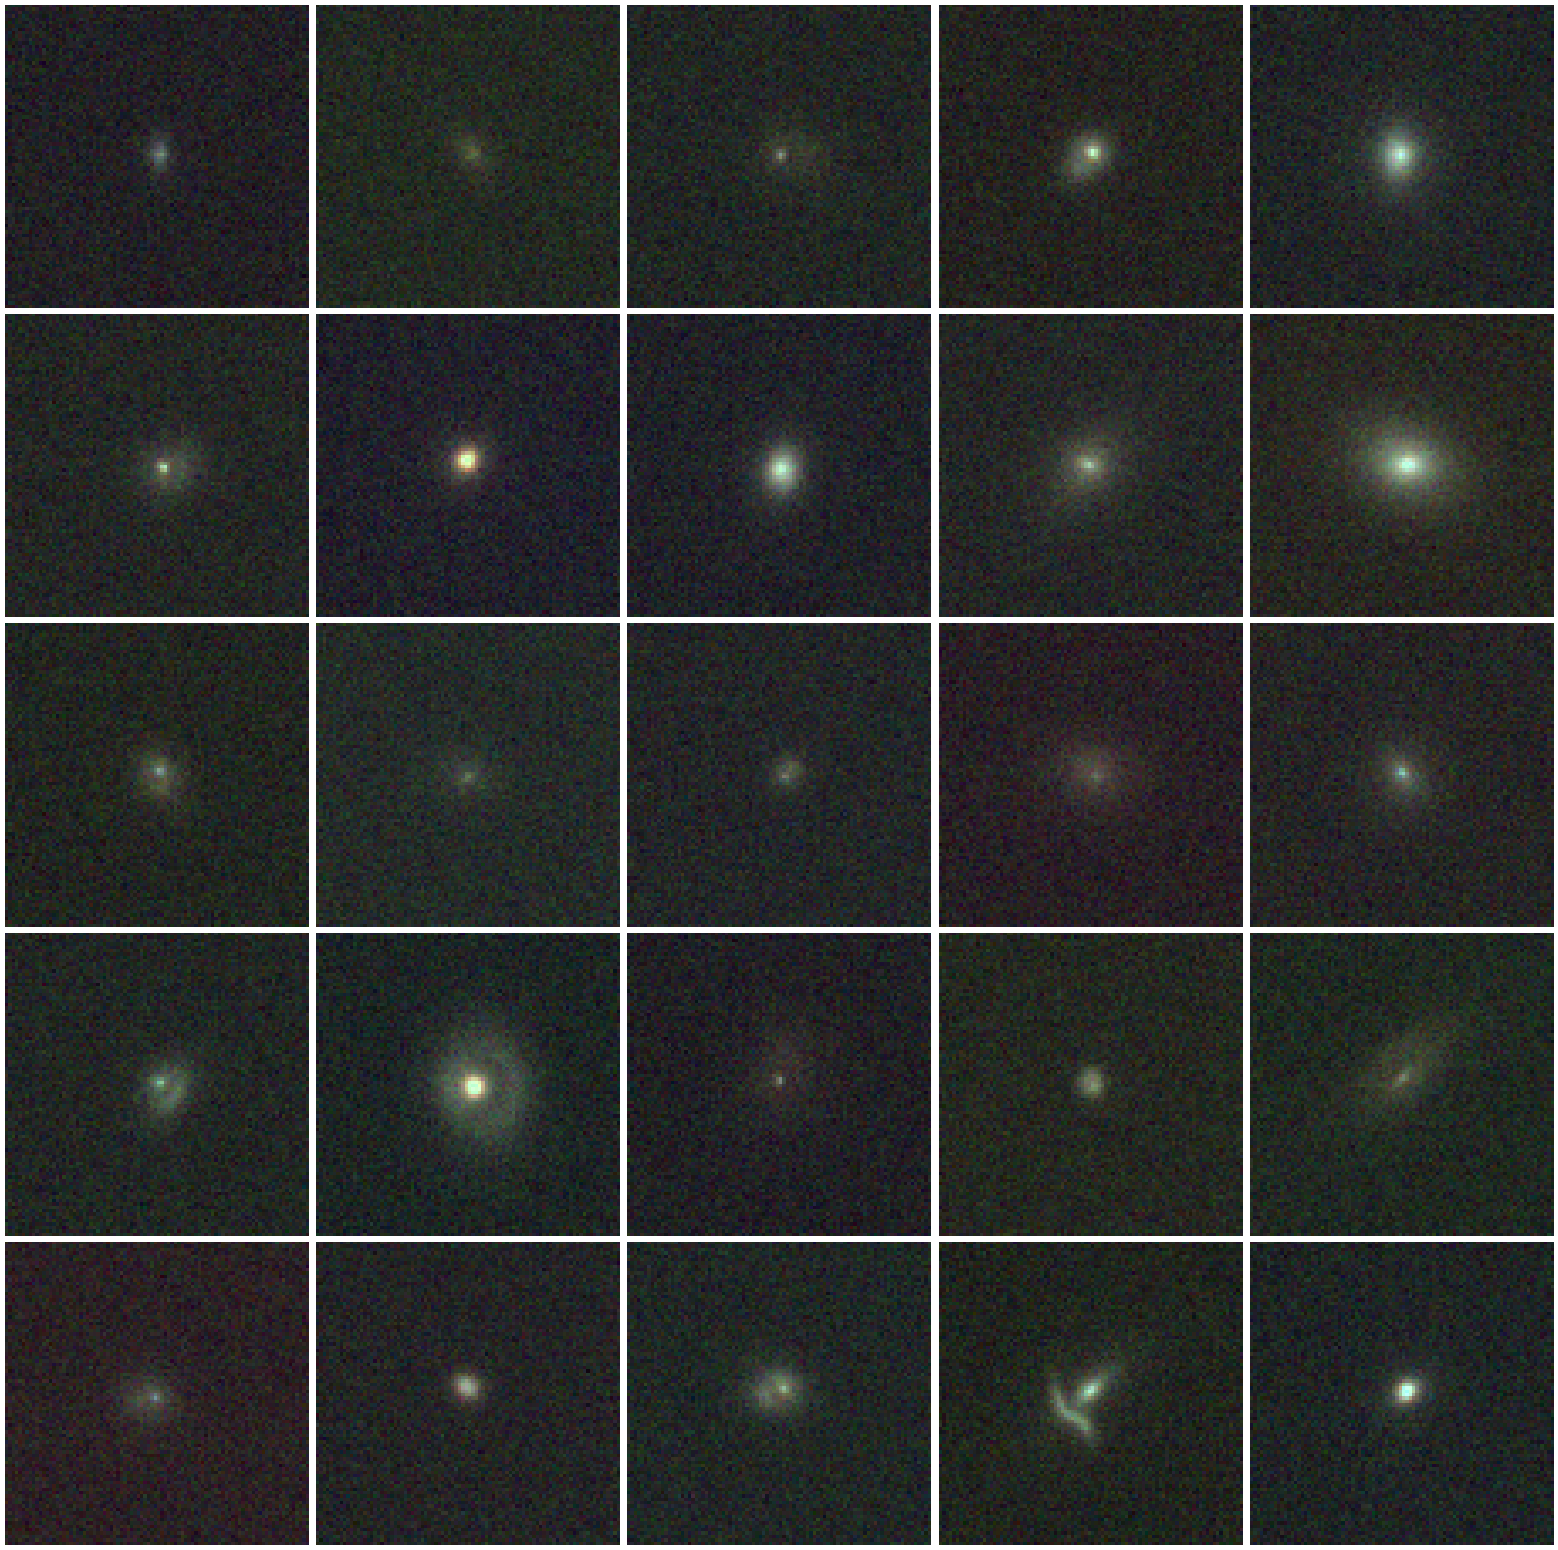

In [13]:
save_path = os.path.join(figure_dir, 'dataset_sample.png')
plot.rgb_plot_grid(color_list, side=side, save=save_path)

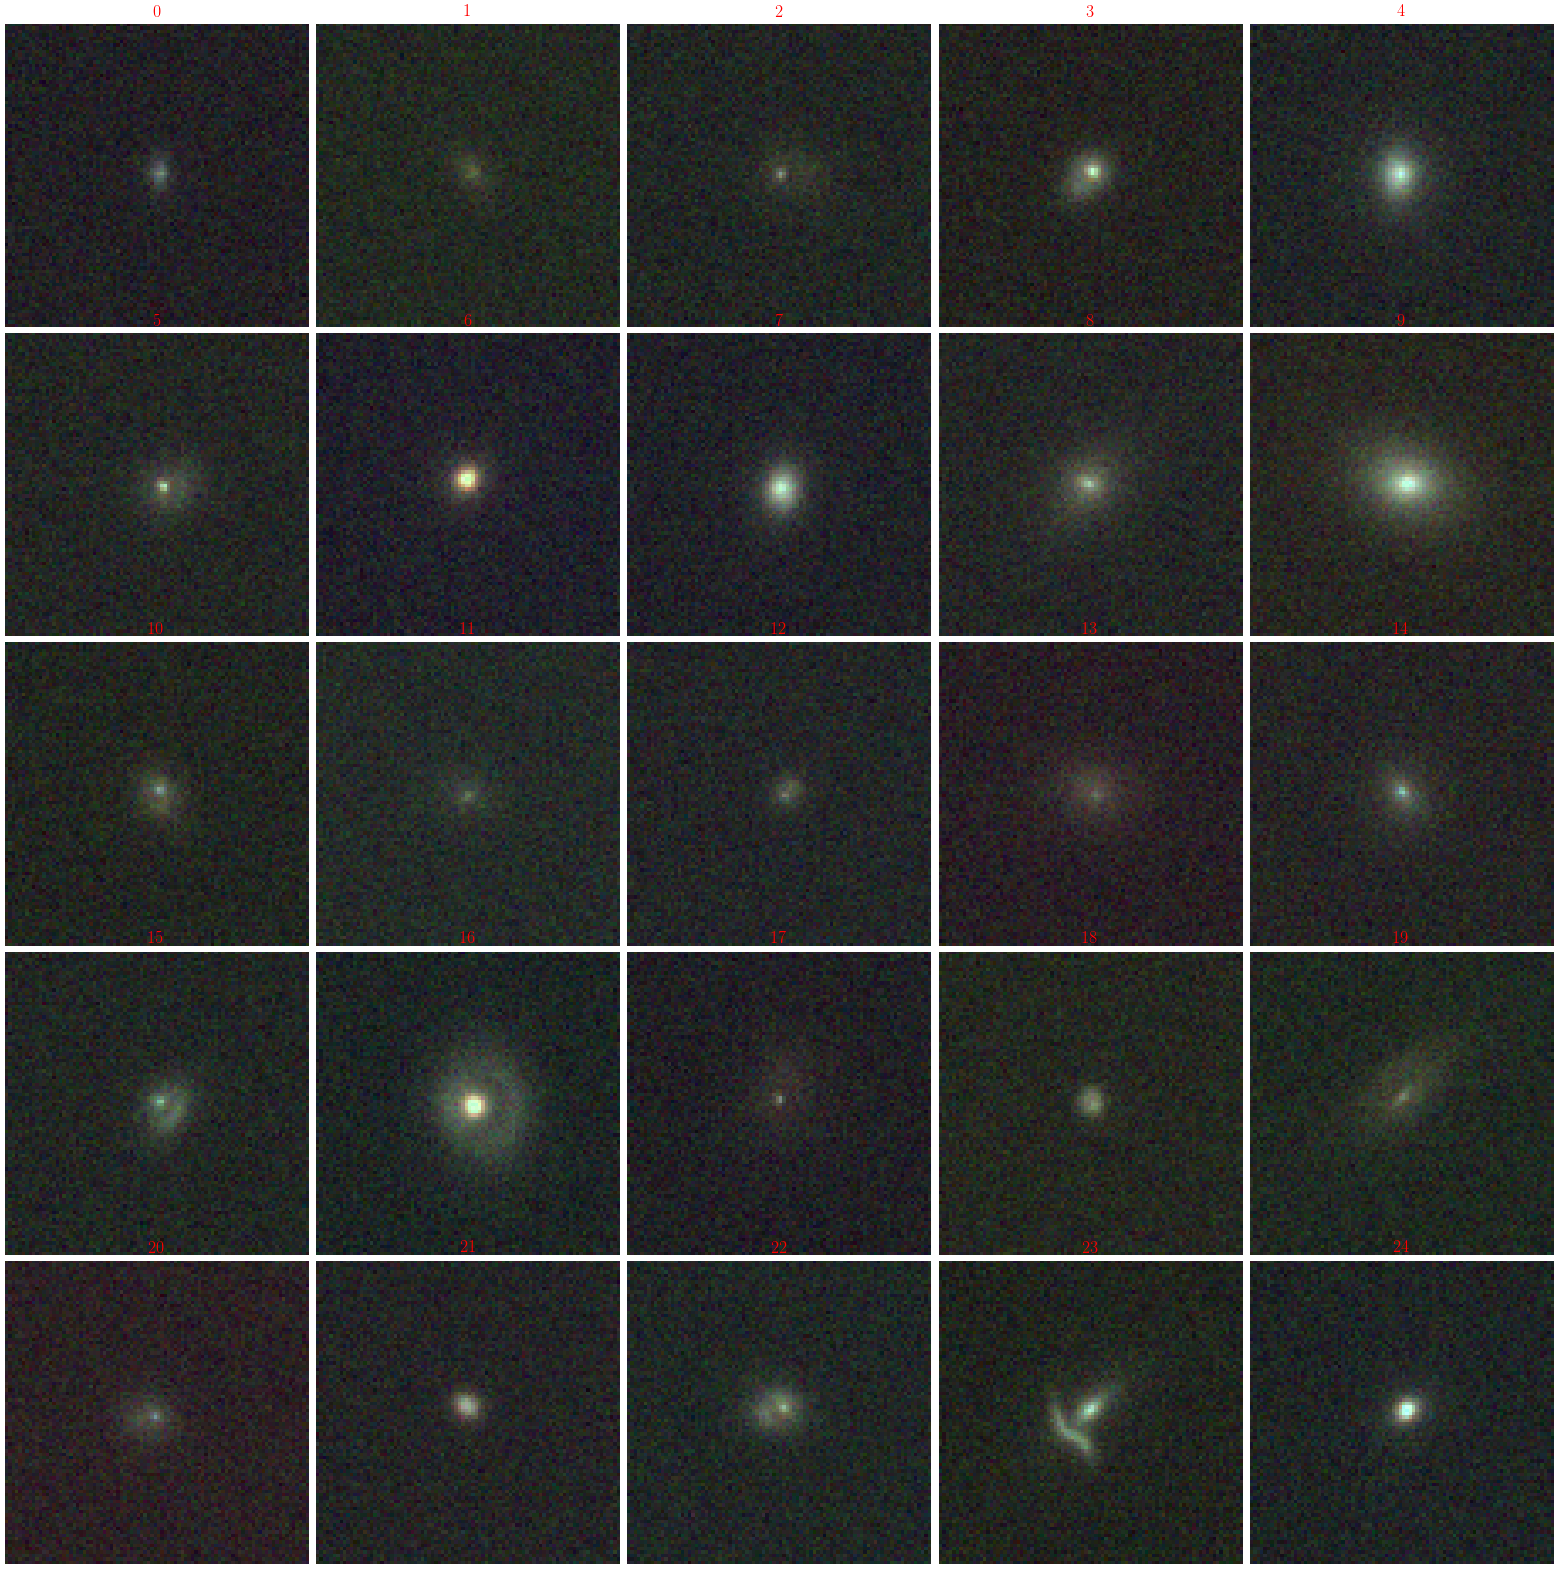

In [14]:
plot.rgb_plot_grid(color_list, side=side, titles=True)

In [15]:
pipeline_params = util.hydra_to_dict(config.pipeline)
pieces = pipeline_params['pieces']

if pieces:
    lens_files = sorted(glob(input_parent_dir + '/galsim_color_*_lens.npy'))
    source_files = sorted(glob(input_parent_dir + '/galsim_color_*_source.npy'))

    lens_files = lens_files[:side ** 2]
    source_files = source_files[:side ** 2]

    lens_list = [np.load(i) for i in lens_files]
    source_list = [np.load(i) for i in source_files]

    plot.rgb_plot_grid(lens_list, side=side)
    plot.rgb_plot_grid(source_list, side=side)